In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
X = df.drop(columns = 'Diabetes_binary')
y = df['Diabetes_binary']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.33, random_state=42)

In [ ]:
print(y_resampled.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64
0.0    23695
1.0    23668
Name: Diabetes_binary, dtype: int64
1.0    11678
0.0    11651
Name: Diabetes_binary, dtype: int64


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled[0]

array([1.        , 0.        , 1.        , 0.21176471, 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.75      , 0.6       ,
       0.42857143])

**Decision Tree**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.6513781130781431

In [ ]:
tree_prediction  = clf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm=confusion_matrix(y_test,tree_prediction)
print(cm)

f1 = f1_score(y_test, tree_prediction)
accuracy = accuracy_score(y_test, tree_prediction)
precision = precision_score(y_test, tree_prediction)
recall = recall_score(y_test, tree_prediction)

# Print the metrics
print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision:", np.round(precision,3))
print("Recall:   ", np.round(recall,3))

[[7620 4031]
 [4102 7576]]
F1 Score:  0.651
Accuracy:  0.651
Precision: 0.653
Recall:    0.649


In [ ]:
tree_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1])
np.round(tree_auc,3)

0.651

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_features = 7, max_depth = 4, random_state=2020)
rf.fit(X_train_scaled,y_train)
rf.score(X_test_scaled, y_test)

0.7372369154271508

In [ ]:
rf_prediction  = rf.predict(X_test_scaled)

In [ ]:
print("train_score - " + str(rf.score(X_train_scaled, y_train)))
print("test_score - " + str(rf.score(X_test_scaled, y_test)))

train_score - 0.7391001414606339
test_score - 0.7372369154271508


In [ ]:
cm=confusion_matrix(y_test,rf_prediction)
print(cm)

f1 = f1_score(y_test, rf_prediction)
accuracy = accuracy_score(y_test, rf_prediction)
precision = precision_score(y_test, rf_prediction)
recall = recall_score(y_test, rf_prediction)

# Print the metrics
print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision:", np.round(precision,3))
print("Recall:   ", np.round(recall,3))

[[8113 3538]
 [2592 9086]]
F1 Score:  0.748
Accuracy:  0.737
Precision: 0.72
Recall:    0.778


In [ ]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1])
np.round(rf_auc,3)

0.813

**Training without hyperparameter tuning**

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=21, learning_rate=0.1, max_features=2, max_depth=2, random_state=42)
gb_model = gb_classifier.fit(X_train_scaled, y_train)
print("train_score - " + str(gb_model.score(X_train_scaled, y_train)))
print("test_score - " + str(gb_model.score(X_test_scaled, y_test)))

train_score - 0.7364398370035682
test_score - 0.7377941617729007


In [ ]:
print(gb_model)

GradientBoostingClassifier(max_depth=2, max_features=2, n_estimators=21,
                           random_state=42)


**Training using RandomSearchCV hyperparameter tuning**

In [ ]:
params = {'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.4, 0.5],
          'max_depth': [1,2,3,4,5,6],
          'max_features': [1,2,3,4,5,6],
          'n_estimators': [20,30,40,50,70,80,100]}

random_search = RandomizedSearchCV(gb_classifier, param_distributions=params, n_iter=10, cv=5, n_jobs=-1, verbose=0)
random_search.fit(X_train_scaled, y_train)

print("train_score - " + str(random_search .score(X_train_scaled, y_train)))
print("test_score - " + str(random_search .score(X_test_scaled, y_test)))

train_score - 0.7503325380571332
test_score - 0.749667795447726


In [ ]:
print(random_search.best_params_)

{'n_estimators': 80, 'max_features': 6, 'max_depth': 2, 'learning_rate': 0.5}


In [ ]:
print(random_search.best_estimator_)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=6,
                           n_estimators=80, random_state=42)


In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=80, learning_rate=0.5, max_features=6, max_depth=2, random_state=42)
gb_model = gb_classifier.fit(X_train_scaled, y_train)
print("train_score - " + str(gb_model.score(X_train_scaled, y_train)))
print("test_score - " + str(gb_model.score(X_test_scaled, y_test)))

train_score - 0.7503325380571332
test_score - 0.749667795447726


In [ ]:
y_pred = gb_classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[8291, 3360],
       [2480, 9198]])

In [ ]:
nTP = cm[1,1]
nTN = cm[0,0]
nFP = cm[0,1]
nFN = cm[1,0]

nActualPos = y_test.sum()
nPredPos = np.array(y_pred).sum()
print(nTP, nTN, nFP, nFN, nActualPos, nPredPos)

9198 8291 3360 2480 11678.0 12558.0


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision: ", np.round(precision,3))
print("Recall: ", np.round(recall,3))

F1 Score:  0.759
Accuracy:  0.75
Precision:  0.732
Recall:  0.788


In [ ]:
roc_auc = roc_auc_score(y_test, gb_classifier.predict_proba(X_test_scaled)[:, 1])
np.round(roc_auc,3)

0.826

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred


array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8167, 3484],
       [2434, 9244]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7463243173732265

In [ ]:
nTP = cm[1,1]
nTN = cm[0,0]
nFP = cm[0,1]
nFN = cm[1,0]

nActualPos = y_test.sum()
nPredPos = np.array(y_pred).sum()
print(nTP, nTN, nFP, nFN, nActualPos, nPredPos)

9244 8167 3484 2434 11678.0 12728


In [ ]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

F1 Score:  0.75751864295665
Accuracy:  0.7463243173732265
Precision:  0.7262727844123193
Recall:  0.7915738996403494


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc

0.8207092773180447

**XG Boost Hyperparameter Tuning**

In [ ]:
params = {'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.4, 0.5],
          'max_depth': [1,2,3,4,5,6],
          'subsample': [0.5, 0.7, 1]}


random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=5, n_jobs=-1, verbose=0)
random_search.fit(X_train_scaled, y_train)

print("train_score - " + str(random_search .score(X_train_scaled, y_train)))
print("test_score - " + str(random_search .score(X_test_scaled, y_test)))

train_score - 0.7522749825813398
test_score - 0.7518110506236872


In [ ]:
print(random_search.best_params_)

{'subsample': 0.5, 'max_depth': 2, 'learning_rate': 0.25}


In [ ]:
tuned_xgb = XGBClassifier(subsample = 0.5, max_depth = 2, learning_rate= 0.25)
tuned_xgb.fit(X_train_scaled, y_train)
y_pred = tuned_xgb.predict(X_test_scaled)
y_pred


array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8237, 3414],
       [2376, 9302]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7518110506236872

In [ ]:
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
print("Precision: ", np.round(precision,3))
print("Recall: ", np.round(recall,3))

F1 Score:  0.763
Accuracy:  0.752
Precision:  0.732
Recall:  0.797


In [ ]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
np.round(roc_auc,3)

0.821

In [ ]:
from sklearn.metrics import roc_curve
tree_fpr, tree_tpr, thr = roc_curve(y_test,clf.predict_proba(X_test_scaled)[:,1])
rf_fpr, rf_tpr, thr = roc_curve(y_test,rf.predict_proba(X_test_scaled)[:,1])
gb_fpr, gb_tpr, thr = roc_curve(y_test,gb_classifier.predict_proba(X_test_scaled)[:,1])
xgb_fpr, xgb_tpr, thr = roc_curve(y_test,tuned_xgb.predict_proba(X_test_scaled)[:,1])

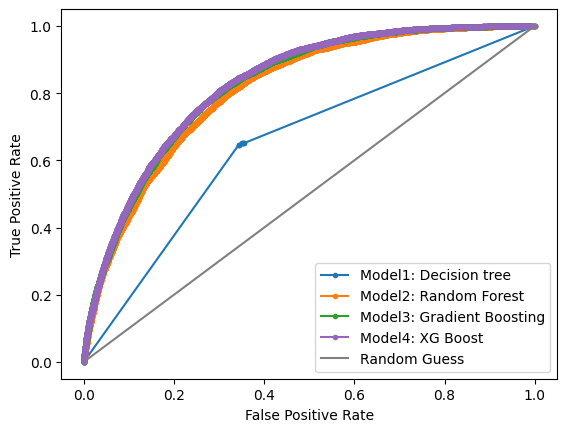

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tree_fpr, tree_tpr, marker='.', color ='C0', label = 'Model1: Decision tree')
plt.plot(rf_fpr, rf_tpr, marker='.', color = 'C1', label = 'Model2: Random Forest')
plt.plot(gb_fpr, gb_tpr, marker='.', color = 'C2', label = 'Model3: Gradient Boosting')
plt.plot(xgb_fpr, xgb_tpr, marker='.', color ='C4', label = 'Model4: XG Boost')
plt.plot([0, 1], [0, 1], color='gray', label='Random Guess')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()